In [6]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [7]:
dataset=pd.read_csv('/content/Cereberal_Dataset.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(43400, 12)


In [8]:
## print the top5 records
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [9]:
dataset.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

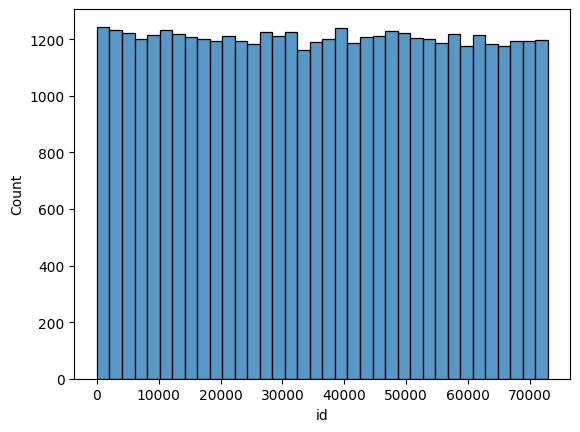

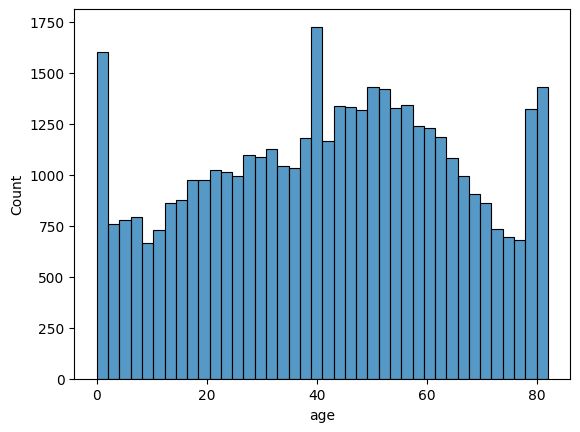

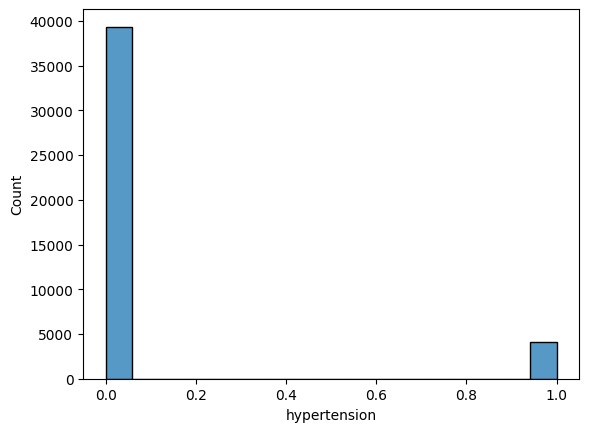

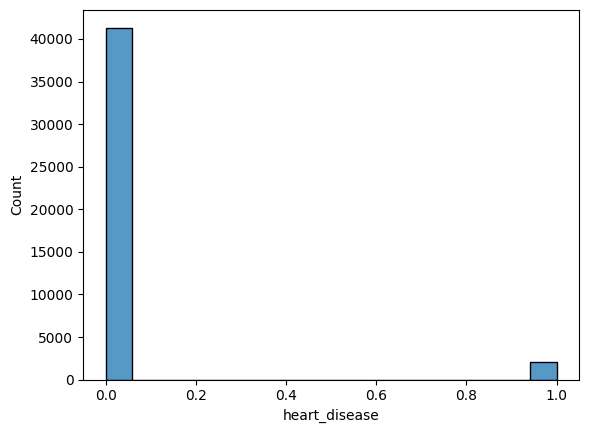

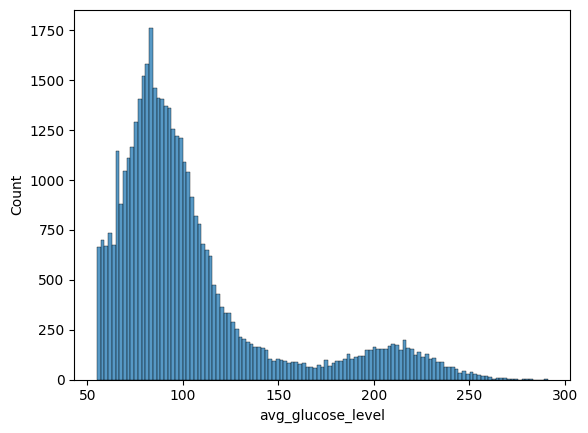

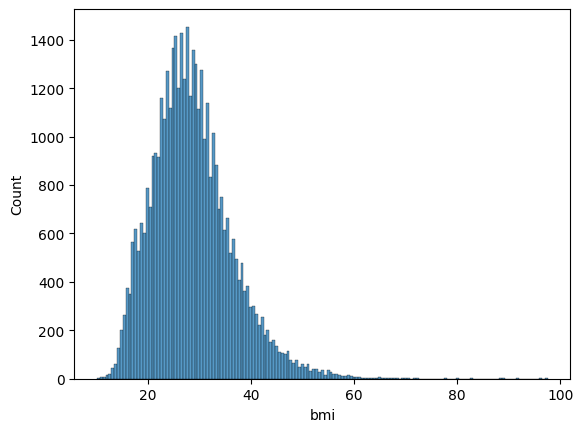

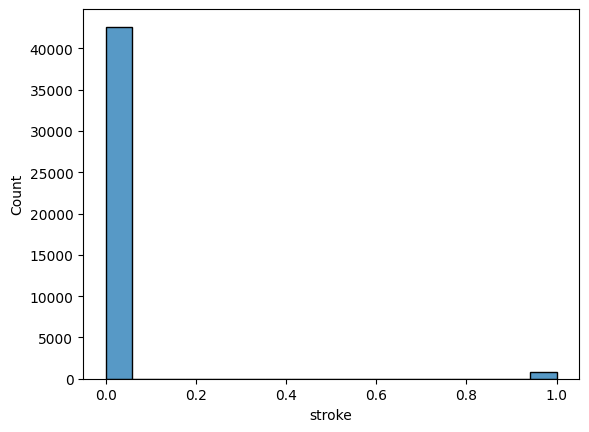

In [35]:
#Histogram to understand the distribution
for i in dataset.select_dtypes(include="number").columns:
  sns.histplot(data=dataset,x=i)
  plt.show()


<Axes: >

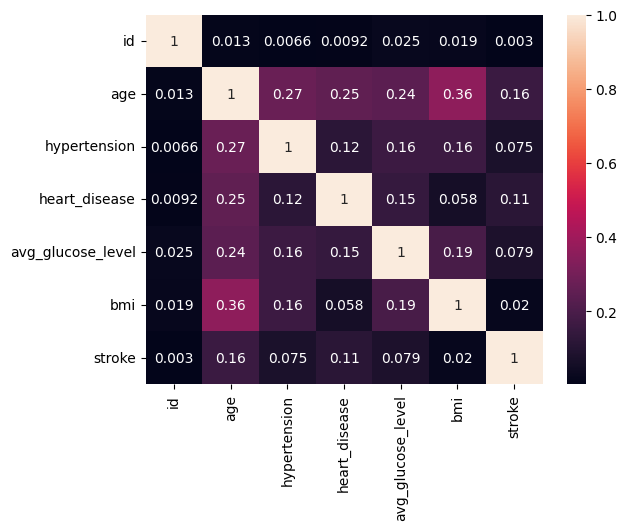

In [36]:

#corelation

s=dataset.select_dtypes(include="number").corr()

plt.figure

sns.heatmap(s,annot=True)


Missing Values


In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

bmi 0.0337  % missing values
smoking_status 0.3063  % missing values


Relationship between Missing value and Stroke

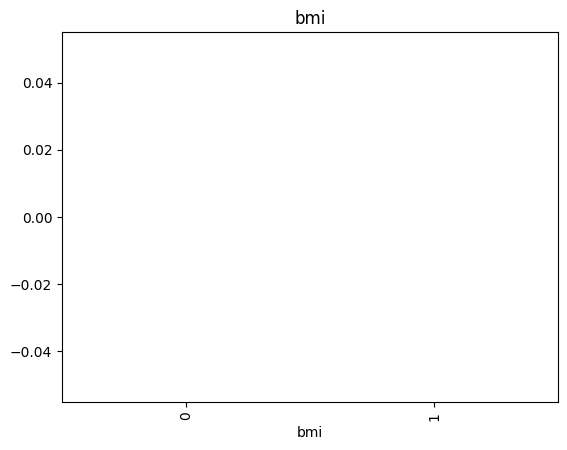

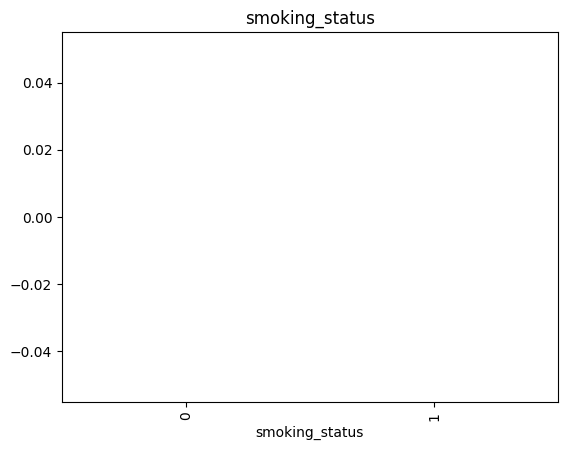

In [11]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean stroke where the information is missing or present
    data.groupby(feature)['stroke'].median().plot.bar()
    plt.title(feature)
    plt.show()

Numerical Variables



In [6]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,30669,3.0,0,0,95.12,18.0,0
1,30468,58.0,1,0,87.96,39.2,0
2,16523,8.0,0,0,110.89,17.6,0
3,56543,70.0,0,0,69.04,35.9,0
4,46136,14.0,0,0,161.28,19.1,0


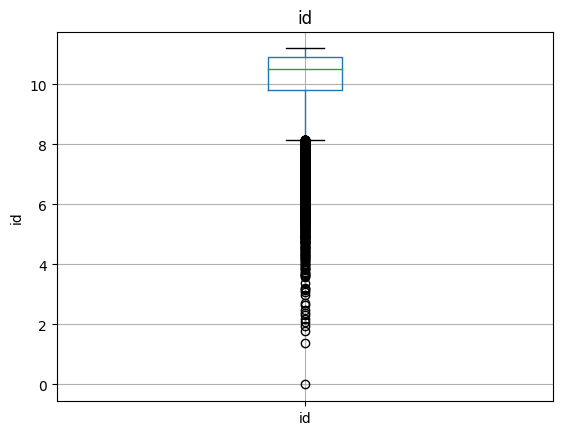

Skipping logarithmic transformation for non-numeric column: gender


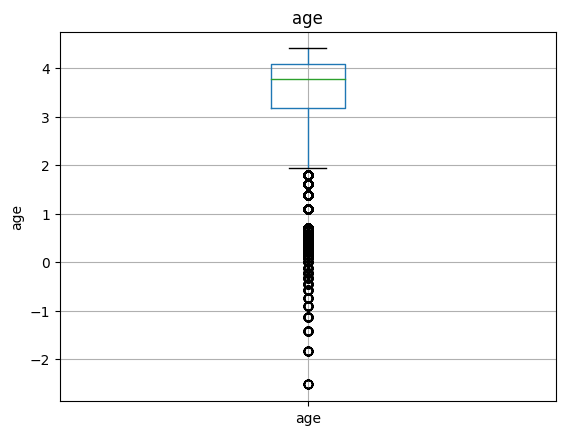

Skipping logarithmic transformation for non-numeric column: ever_married
Skipping logarithmic transformation for non-numeric column: work_type
Skipping logarithmic transformation for non-numeric column: Residence_type


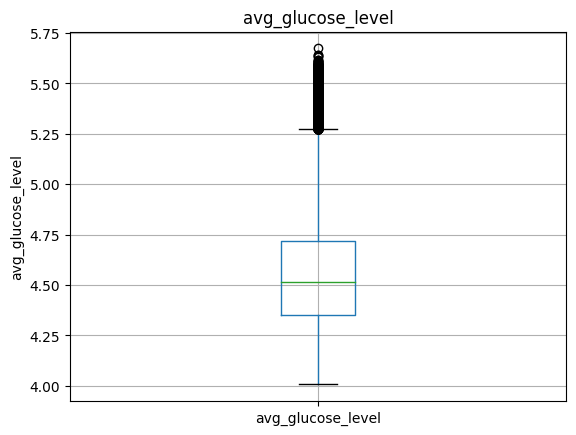

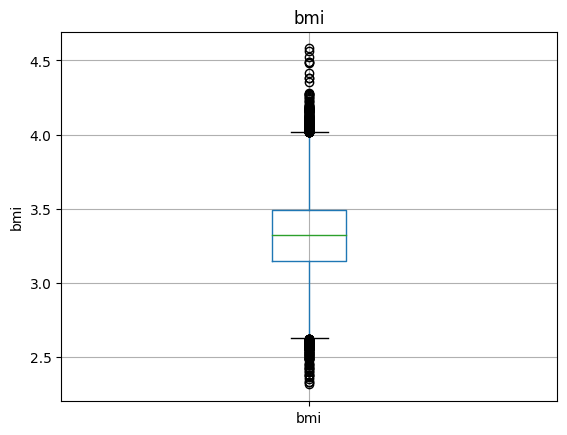

Skipping logarithmic transformation for non-numeric column: smoking_status


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for feature in dataset:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    elif data[feature].dtype != 'O': # Check if the column is numeric
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    else:
        print(f"Skipping logarithmic transformation for non-numeric column: {feature}") # Inform the user about skipped columns

In [13]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [14]:
dataset[categorical_features].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN


In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is gender and number of categories are 3
The feature is ever_married and number of categories are 2
The feature is work_type and number of categories are 5
The feature is Residence_type and number of categories are 2
The feature is smoking_status and number of categories are 4


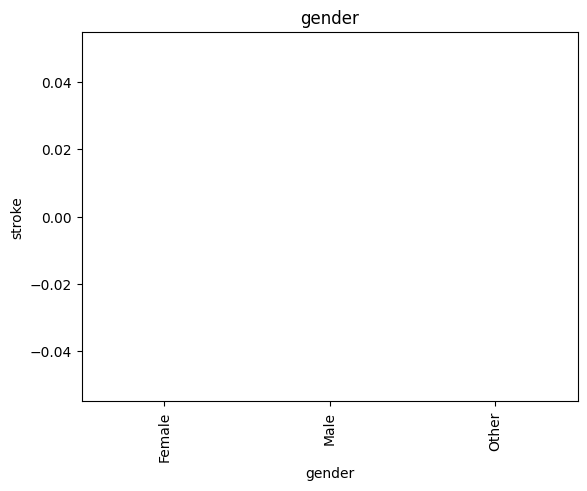

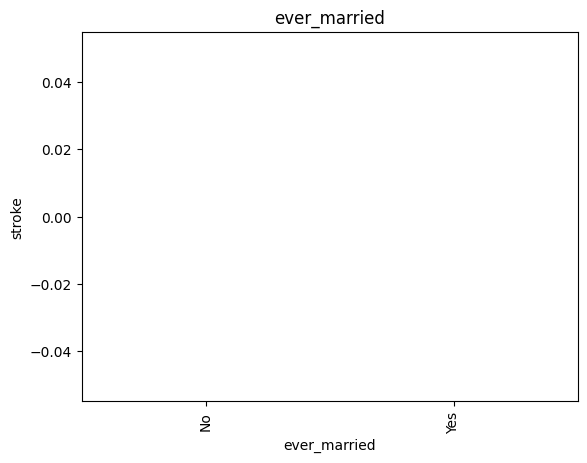

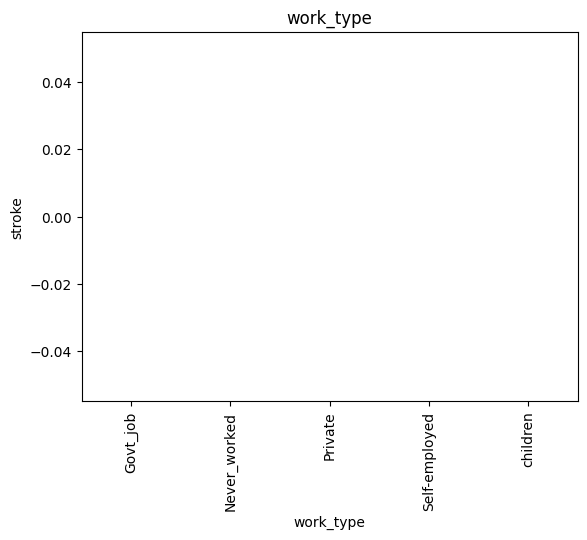

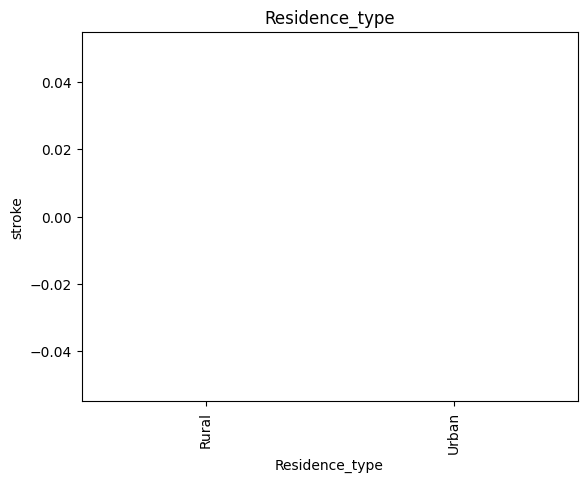

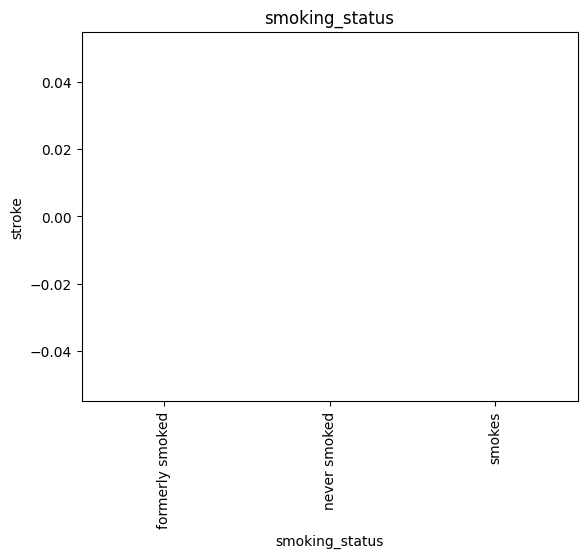

In [16]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['stroke'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('stroke')
    plt.title(feature)
    plt.show()

Feature Engineering

In [13]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['stroke'],test_size=0.1,random_state=0)

Missing Values

In [14]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

smoking_status: 0.3063% missing values


In [15]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

bmi: 0.0337% missing value


In [16]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()

    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_with_nan].isnull().sum()


bmi    0
dtype: int64

In [17]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [24]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['stroke'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [26]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bminan
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Rare_var,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Rare_var,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,46136,Male,14.0,0,0,No,Rare_var,Rural,161.28,19.1,Rare_var,0,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Rare_var,0,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,0


In [18]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['id','stroke'] ]
len(scaling_feature)

11

In [19]:
scaling_feature

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'bminan']

In [20]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bminan
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0


In [21]:
dataset.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
bminan                   0
dtype: int64

In [22]:

#Missing value Treatments(Mean,Median,Mode,KNNImputer)
dataset.isnull().sum()
#fillin the BMI(Body Mass Index)
dataset['bmi'] = dataset.groupby('age')['bmi'].transform(lambda x: x.fillna(x.mean()))
dataset.isnull().sum()


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
bminan                   0
dtype: int64

In [23]:
#Filling the smoking_satus
mode_smoking_status = dataset['smoking_status'].mode()[0]
dataset['smoking_status'].fillna(mode_smoking_status, inplace=True)
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bminan               0
dtype: int64

In [24]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bminan               0
dtype: int64

Feature Scaling

In [25]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bminan
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,0


In [26]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
df=dataset
# One-hot encode the categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
categorical_encoded = onehot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the one-hot encoded columns
categorical_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the new one-hot encoded columns
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, categorical_df], axis=1)

# Fill missing values in numerical columns with the median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].median(), inplace=True)

# Apply Min-Max scaling to all columns to scale them to the (0,1) range
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the scaled dataset
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bminan,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,0.420444,0.035645,0.0,0.0,0.169964,0.090286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.417688,0.707031,1.0,0.0,0.139631,0.332571,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.226509,0.096680,0.0,0.0,0.236772,0.085714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.775164,0.853516,0.0,0.0,0.059479,0.294857,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.632489,0.169922,0.0,0.0,0.450244,0.102857,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


df = dataset

# Identify the columns to be one-hot encoded
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# One-hot encode the categorical columns
categorical_encoded = onehot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the one-hot encoded columns
categorical_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the new one-hot encoded columns
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, categorical_df], axis=1)

# Fill missing values in numerical columns with the median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].median(), inplace=True)

# Apply Min-Max scaling to all columns to scale them to the (0,1) range
scaler = MinMaxScaler()
feature_scale = df.columns.difference(['id', 'stroke'])  # Exclude 'id' and 'stroke' columns from scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_scale]), columns=feature_scale)

# Combine the 'id' and 'stroke' columns with the scaled feature columns
data = pd.concat([df[['id', 'stroke']].reset_index(drop=True), df_scaled], axis=1)

# Display the transformed dataset
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,stroke,Residence_type_Urban,age,avg_glucose_level,bmi,bminan,ever_married_Yes,gender_Male,gender_Other,heart_disease,hypertension,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,30669,0,0.0,0.035645,0.169964,0.090286,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,30468,0,1.0,0.707031,0.139631,0.332571,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,16523,0,1.0,0.096680,0.236772,0.085714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,56543,0,0.0,0.853516,0.059479,0.294857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,46136,0,0.0,0.169922,0.450244,0.102857,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


df = dataset

# Identify the columns to be one-hot encoded
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# One-hot encode the categorical columns
categorical_encoded = onehot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the one-hot encoded columns
categorical_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the new one-hot encoded columns
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, categorical_df], axis=1)

# Fill missing values in numerical columns with the median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].median(), inplace=True)

# Apply Min-Max scaling to all columns to scale them to the (0,1) range
scaler = MinMaxScaler()
feature_scale = df.columns.difference(['id', 'stroke'])  # Exclude 'id' and 'stroke' columns from scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_scale]), columns=feature_scale)

# Combine the 'id' and 'stroke' columns with the scaled feature columns
data = pd.concat([df[['id', 'stroke']].reset_index(drop=True), df_scaled], axis=1)

# Save the transformed dataset to a new CSV file
output_file_path = '/content/sample_data/mnist_train_small.csv'
data.to_csv(output_file_path, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
data.to_csv('X_train.csv',index=False)

In [34]:
file_path = 'X_train.csv'  # Update the path if needed
df = pd.read_csv(file_path)
df.head()


,id,stroke,Residence_type_Urban,age,avg_glucose_level,bmi,bminan,ever_married_Yes,gender_Male,gender_Other,heart_disease,hypertension,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,30669,0,0.0,0.035645,0.169964,0.090286,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,30468,0,1.0,0.707031,0.139631,0.332571,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,16523,0,1.0,0.096680,0.236772,0.085714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,56543,0,0.0,0.853516,0.059479,0.294857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,46136,0,0.0,0.169922,0.450244,0.102857,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Split the Data into Training and Testing Sets

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = data.drop(['stroke'], axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")

Training and testing sets created.


2. Train a Machine Learning Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


3. Evaluate the Model

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9814516129032258
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.50      0.01      0.01       161

    accuracy                           0.98      8680
   macro avg       0.74      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



4. Tune the Model (Optional)

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print(f"Best Model Classification Report:\n{report_best}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9822004608294931
Best Model Accuracy: 0.9816820276497696
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.75      0.02      0.04       161

    accuracy                           0.98      8680
   macro avg       0.87      0.51      0.51      8680
weighted avg       0.98      0.98      0.97      8680

